<a href="https://colab.research.google.com/github/MarioAvolio/Amazon-Fine-Foods-reviews-Transformers-Text-Classification/blob/main/Amazon_Fine_Food_Review_Text_Preprocessing_and_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credits


**Mario Avolio: 880995 - https://marioavolio.netlify.app/**

Credits: 
- https://www.oreilly.com/library/view/practical-natural-language/9781492054047/

Dataset:
- https://snap.stanford.edu/data/web-FineFoods.html



In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt # plotting
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import nltk
#https://www.nltk.org/

#NLTK is a leading platform for building Python programs to work with human language data. 
#It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, 
#along with a suite of text processing libraries for classification, tokenization, 
#stemming, tagging, parsing, and semantic reasoning, wrappers for industrial-strength 
#NLP libraries, and an active discussion forum.

nltk.download('punkt') 

nltk.download('stopwords')
# Downloading stop words from NLTK nltk.download ('stopwords')


from nltk.tokenize import word_tokenize
#Tokenizers divide strings into lists of substrings. For example, tokenizers can 
#be used to find the words and punctuation in a string

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Constants and Methods

In [ ]:
PATH_PROJ = "/content/drive/MyDrive/data-proj/"
# if not os.path.exists(PATH_PROJ):
#   PATH_PROJ = "/content/drive/MyDrive/shared/data-proj/"

PATH_DATASET = PATH_PROJ+"food.csv"
PATH_DATASET_PREPROCESSED = PATH_PROJ+"preprocessed.csv"
PATH_DATASET_FIRST_PREPROCESSING = PATH_PROJ+"first_preprocessing.csv"

In [ ]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('Number of sentences')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [ ]:
def get_random_sentences_from_dataset():
  for elem in df.text.sample(30).to_numpy():
    print(" \n ---> ",elem)
  

# Pipeline

We would normally
walk through the requirements and break the problem down into several subproblems, then try to develop a step-by-step procedure to solve them. Since language
processing is involved, we would also list all the forms of text processing needed at
each step. This step-by-step processing of text is known as a pipeline. It is the series of
steps involved in building any NLP model. These steps are common in every NLP
project

The first step in the process of developing any NLP system is to collect data relevant
to the given task. Even if we’re building a rule-based system, we still need some data
to design and test our rules. The data we get is seldom clean, and this is where text
cleaning comes into play. After cleaning, text data often has a lot of variations and
needs to be converted into a canonical form. This is done in the pre-processing step.
This is followed by feature engineering, where we carve out indicators that are most
suitable for the task at hand. These indicators are converted into a format that is
understandable by modeling algorithms. Then comes the modeling and evaluation
phase, where we build one or more models and compare and contrast them using a
relevant evaluation metric(s). Once the best model among the ones evaluated is
chosen, we move toward deploying this model in production. Finally, we regularly
monitor the performance of the model and, if need be, update it to keep up its
performance.


# Data 

In [ ]:
df = pd.read_csv(PATH_DATASET)

In [ ]:

df

,productid,userid,score,text
0,B001E4KFG0,A3SGXH7AUHU8GW,5.0,I have bought several of the Vitality canned d...
1,B00813GRG4,A1D87F6ZCVE5NK,1.0,Product arrived labeled as Jumbo Salted Peanut...
2,B000LQOCH0,ABXLMWJIXXAIN,4.0,This is a confection that has been around a fe...
3,B000UA0QIQ,A395BORC6FGVXV,2.0,If you are looking for the secret ingredient i...
4,B006K2ZZ7K,A1UQRSCLF8GW1T,5.0,Great taffy at a great price. There was a wid...
...,...,...,...,...
35167,B000E1DSQS,A2QG0Z96HULRW7,5.0,"Once I tasted Hazelnut coffee, I was hooked! N..."
35168,B000E1DSQS,A3F653OGB0ZF4X,5.0,Has Maxwell House quit making this coffee? I ...
35169,B000E1DSQS,AJD41FBJD9010,5.0,"Nutty, smooth, subtle, with a WONDERFUL aroma-..."
35170,B000E1DSQS,A33R5P618X7MG7,5.0,Price was right and the taste very good. We w...


In [ ]:
print(type(df))
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
(35172, 4)


In [ ]:
print(df.columns)

Index(['productid', 'userid', 'score', 'text'], dtype='object')


In [ ]:

nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 35172 rows and 4 columns


In [ ]:
df.head(6)

,productid,userid,score,text
0,B001E4KFG0,A3SGXH7AUHU8GW,5.0,I have bought several of the Vitality canned d...
1,B00813GRG4,A1D87F6ZCVE5NK,1.0,Product arrived labeled as Jumbo Salted Peanut...
2,B000LQOCH0,ABXLMWJIXXAIN,4.0,This is a confection that has been around a fe...
3,B000UA0QIQ,A395BORC6FGVXV,2.0,If you are looking for the secret ingredient i...
4,B006K2ZZ7K,A1UQRSCLF8GW1T,5.0,Great taffy at a great price. There was a wid...
5,B006K2ZZ7K,ADT0SRK1MGOEU,4.0,I got a wild hair for taffy and ordered this f...


Let's isolate the useful columns to our end. 

In [ ]:
df = df[["text","score"]]

In [ ]:
df.iloc[30:40]

,text,score
30,"I have never been a huge coffee fan. However, ...",5.0
31,"This offer is a great price and a great taste,...",5.0
32,McCann's Instant Oatmeal is great if you must ...,4.0
33,This is a good instant oatmeal from the best o...,4.0
34,Instant oatmeal can become soggy the minute th...,5.0
35,"McCann's Instant Irish Oatmeal, Variety Pack o...",4.0
36,For those of us with celiac disease this produ...,5.0
37,"What else do you need to know? Oatmeal, instan...",5.0
38,I WAS VISITING MY FRIEND NATE THE OTHER MORNIN...,4.0
39,I ordered this for my wife as it was reccomend...,5.0


## Looking at the Class Distribution


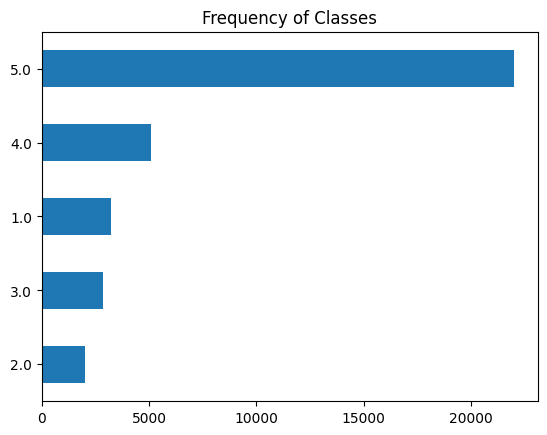

In [ ]:
import matplotlib.pyplot as plt
df["score"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

In this case, we can see that the dataset is heavily imbalanced; There are several ways to deal with imbalanced data, including:
- Randomly oversample the minority class.
- Randomly undersample the majority class.
- Gather more labeled data from the underrepresented classes.

## How Long Are Our Review?
Transformer models have a maximum input sequence length that is referred to as the
maximum context size. For applications using DistilBERT, the maximum context size
is 512 tokens, which amounts to a few paragraphs of text. 

<ipython-input-14-f290b2bc95a1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Words Per Review"] = df["text"].str.split().apply(len)


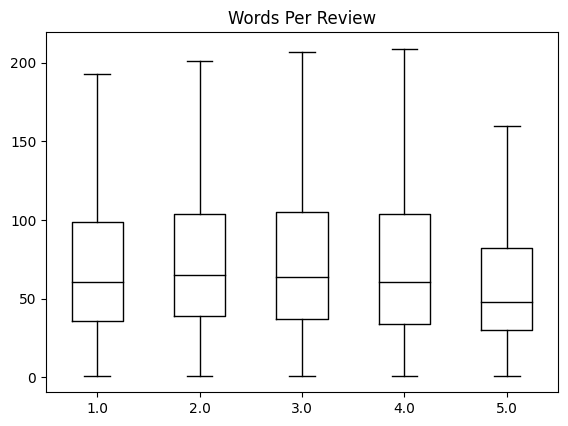

In [ ]:
df["Words Per Review"] = df["text"].str.split().apply(len)
df.boxplot("Words Per Review", by="score", grid=False,
showfliers=False, color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()
df = df[["text", "score"]]

From the plot we see that for each emotion, most tweets are around 60 words long
and the longest tweets are well below DistilBERT’s maximum context size. Texts that
are longer than a model’s context size need to be truncated, which can lead to a loss in
performance if the truncated text contains crucial information; in this case, it looks
like that won’t be an issue.

Map target label to String
1. VERY NEGATIVE
2. NEGATIVE
3. NEUTRAL
4. POSITIVE
5. EXCELLENT


# Pre-Processing
Our text-extraction step removed all this and gave us the plain text of the
article we need. However, all NLP software typically works at the sentence level and
expects a separation of words at the minimum. So, we need some way to split a text
into words and sentences before proceeding further in a processing pipeline. Some‐
times, we need to remove special characters and digits, and sometimes, we don’t care
whether a word is in upper or lowercase and want everything in lowercase. Many
more decisions like this are made while processing text. Such decisions are addressed
during the pre-processing step of the NLP pipeline. Here are some common preprocessing steps used in NLP software:

- Preliminaries: Sentence segmentation and word tokenization.
- Frequent steps: Stop word removal, stemming and lemmatization, removing digits/punctuation,
lowercasing, etc.
- Other steps: Normalization, language detection, code mixing, transliteration, etc.
- Advanced processing: POS tagging, parsing, coreference resolution, etc.

## First Cleanup
Text extraction and cleanup refers to the process of extracting raw text from the input
data by removing all the other non-textual information, such as markup, metadata,
etc., and converting the text to the required encoding format

In [ ]:
from bs4 import BeautifulSoup

def clean_html_tags(row):
  soupified = BeautifulSoup(row, "html.parser")
  for linebreak in soupified.find_all('br'): #remove br
    linebreak.replace_with(" ")

  span_tags = soupified.find_all('span') # remove span
  for span in span_tags:
      span.unwrap()
  
  return str(str(soupified))

In [ ]:
df.text.iloc[10]

"I don't know if it's the cactus or the tequila or just the unique combination of ingredients, but the flavour of this hot sauce makes it one of a kind!  We picked up a bottle once on a trip we were on and brought it back home with us and were totally blown away!  When we realized that we simply couldn't find it anywhere in our city we were bummed.<br /><br />Now, because of the magic of the internet, we have a case of the sauce and are ecstatic because of it.<br /><br />If you love hot sauce..I mean really love hot sauce, but don't want a sauce that tastelessly burns your throat, grab a bottle of Tequila Picante Gourmet de Inclan.  Just realize that once you taste it, you will never want to use any other sauce.<br /><br />Thank you for the personal, incredible service!"

In [ ]:
for elem in df.text.sample(30).to_numpy():
  print(" \n ---> ",clean_html_tags(elem))
  

 
 --->  I had been using this cat food for several months.  I had rescued a cat looking awfully skinny and dehydrated and as she began to fatten a little she quickly showed signs of pregnancy.  She gave birth a few weeks late to 6 kittens and I still have them all.  They have been fed nothing but Diamond once weaned and have beautiful coats and are very healthy and bouncy.  So thankful for Diamond.
 
 --->  I have been buying these habenero peanuts for some time and they are VERY good and, unfortunately, as advertised, they are also VERY ADDICTIVE!  ( I am consuming them as I speak...electronically)  FORTUNATELY, they are much better NOW since I can order them from AMAZON where I get a MUCH BETTER PRICE and LOW TWO DAY SHIPPING with my membership.  This is not a paid advertisement.  John
 
 --->  I fell in love with this coffee in a fine SF restaurant and have felt spoiled ever since!  This is THE BEST Decaf coffee you can find anywhere and it does not taste like a decaf at all.  This

In [ ]:
df['text'] = df['text'].apply(clean_html_tags)

<ipython-input-15-218549339a04>:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soupified = BeautifulSoup(row, "html.parser")
<ipython-input-15-218549339a04>:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soupified = BeautifulSoup(row, "html.parser")


In [ ]:
df.to_csv(PATH_DATASET_FIRST_PREPROCESSING, index=False)

## Preliminaries

As mentioned earlier, NLP software typically analyzes text by breaking it up into
words (tokens) and sentences. Hence, any NLP pipeline has to start with a reliable
system to split the text into sentences (sentence segmentation) and further split a sentence into words (word tokenization)

### Sentence segmentation

As a simple rule, we can do sentence segmentation by breaking up text into sentences
at the appearance of full stops and question marks. However, there may be abbrevia‐
tions, forms of addresses (Dr., Mr., etc.), or ellipses (...) that may break the simple
rule.

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [ ]:
df.text.iloc[10]

"I don't know if it's the cactus or the tequila or just the unique combination of ingredients, but the flavour of this hot sauce makes it one of a kind!  We picked up a bottle once on a trip we were on and brought it back home with us and were totally blown away!  When we realized that we simply couldn't find it anywhere in our city we were bummed.  Now, because of the magic of the internet, we have a case of the sauce and are ecstatic because of it.  If you love hot sauce..I mean really love hot sauce, but don't want a sauce that tastelessly burns your throat, grab a bottle of Tequila Picante Gourmet de Inclan.  Just realize that once you taste it, you will never want to use any other sauce.  Thank you for the personal, incredible service!"

In [ ]:
sent_tokenize(df.text.iloc[10])

["I don't know if it's the cactus or the tequila or just the unique combination of ingredients, but the flavour of this hot sauce makes it one of a kind!",
 'We picked up a bottle once on a trip we were on and brought it back home with us and were totally blown away!',
 "When we realized that we simply couldn't find it anywhere in our city we were bummed.",
 'Now, because of the magic of the internet, we have a case of the sauce and are ecstatic because of it.',
 "If you love hot sauce..I mean really love hot sauce, but don't want a sauce that tastelessly burns your throat, grab a bottle of Tequila Picante Gourmet de Inclan.",
 'Just realize that once you taste it, you will never want to use any other sauce.',
 'Thank you for the personal, incredible service!']

In [ ]:
df.text = df.text.apply(sent_tokenize)

### Word tokenization
While readily available solutions work for most of our needs and most NLP libraries
will have a tokenizer and sentence splitter bundled with them, it’s important to
remember that they’re far from perfect. For example, consider this sentence: “Mr. Jack
O’Neil works at Melitas Marg, located at 245 Yonge Avenue, Austin, 70272.” If we run
this through the NLTK tokenizer, O, ‘, and Neil are identified as three separate tokens.
Similarly, if we run the sentence: “There are \$10,000 and €1000 which are there just
for testing a tokenizer” through this tokenizer, while $ and 10,000 are identified as
separate tokens, €1000 is identified as a single token. In another scenario, if we want
to tokenize tweets, this tokenizer will separate a hashtag into two tokens: a “#” sign
and the string that follows it. In such cases, we may need to use a custom tokenizer
built for our purpose

In [ ]:
def word_tokenize_custom(list_of_sent):
  list_of_word = []
  for sent in list_of_sent:
    list_of_word.extend(word_tokenize(sent))

  return list_of_word

In [ ]:
#word_tokenize function

print(df.text.iloc[10])
print(word_tokenize_custom(df.text.iloc[10]))

["I don't know if it's the cactus or the tequila or just the unique combination of ingredients, but the flavour of this hot sauce makes it one of a kind!", 'We picked up a bottle once on a trip we were on and brought it back home with us and were totally blown away!', "When we realized that we simply couldn't find it anywhere in our city we were bummed.", 'Now, because of the magic of the internet, we have a case of the sauce and are ecstatic because of it.', "If you love hot sauce..I mean really love hot sauce, but don't want a sauce that tastelessly burns your throat, grab a bottle of Tequila Picante Gourmet de Inclan.", 'Just realize that once you taste it, you will never want to use any other sauce.', 'Thank you for the personal, incredible service!']
['I', 'do', "n't", 'know', 'if', 'it', "'s", 'the', 'cactus', 'or', 'the', 'tequila', 'or', 'just', 'the', 'unique', 'combination', 'of', 'ingredients', ',', 'but', 'the', 'flavour', 'of', 'this', 'hot', 'sauce', 'makes', 'it', 'one',

When dealing with social media text, we usually want to identify urls, hashtags, smileys as separate objects and do not tokenize it to individual characters.

In [ ]:
import re
 
emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        [D\)\]\(\]/\\OpP] # Mouth
    )"""
 
regex_str = [
    emoticons_str,
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
]

    

emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)


tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)
 
def tokenize(s):
    return tokens_re.findall(s)
 
def preprocess(list_of_sentences):
  sentence = []
  for sent in list_of_sentences:
    sent = emoji_pattern.sub(r'', sent)
    sentence.extend(tokenize(sent))
  
  return np.array(sentence)

In [ ]:
preprocess(df.text.iloc[10])

array(['I', "don't", 'know', 'if', "it's", 'the', 'cactus', 'or', 'the',
       'tequila', 'or', 'just', 'the', 'unique', 'combination', 'of',
       'ingredients', ',', 'but', 'the', 'flavour', 'of', 'this', 'hot',
       'sauce', 'makes', 'it', 'one', 'of', 'a', 'kind', '!', 'We',
       'picked', 'up', 'a', 'bottle', 'once', 'on', 'a', 'trip', 'we',
       'were', 'on', 'and', 'brought', 'it', 'back', 'home', 'with', 'us',
       'and', 'were', 'totally', 'blown', 'away', '!', 'When', 'we',
       'realized', 'that', 'we', 'simply', "couldn't", 'find', 'it',
       'anywhere', 'in', 'our', 'city', 'we', 'were', 'bummed', '.',
       'Now', ',', 'because', 'of', 'the', 'magic', 'of', 'the',
       'internet', ',', 'we', 'have', 'a', 'case', 'of', 'the', 'sauce',
       'and', 'are', 'ecstatic', 'because', 'of', 'it', '.', 'If', 'you',
       'love', 'hot', 'sauce', '.', '.', 'I', 'mean', 'really', 'love',
       'hot', 'sauce', ',', 'but', "don't", 'want', 'a', 'sauce', 'that',
     

In [ ]:
df.text = df.text.apply(preprocess) 

## Frequent Steps
Some of
the frequently used words in English, such as a, an, the, of, in, etc., are not particularly useful for this task, as they don’t carry any content on their own to separate
between the four categories. Such words are called stop words and are typically
(though not always) removed from further analysis in such problem scenarios. There
is no standard list of stop words for English, though. There are some popular lists
(NLTK has one, for example), although what a stop word is can vary depending on what we’re working on.

Similarly, in some cases, upper or lowercase may not make a difference for the problem. So, all text is lowercased (or uppercased, although lowercasing is more common). Removing punctuation and/or numbers is also a common step for many NLP
problems, such as text classification, information retrieval,
and social media analytics


In [ ]:
from nltk.corpus import stopwords
from string import punctuation
 
def preprocess_corpus(texts):
  '''
  Remove stop words, digits, and punctuation and lowercase a given collection of texts
  '''
  mystopwords = set(stopwords.words("english"))
  stop = set()
  #adding some of the stopwords after observing the tweets
  stop.add("The")
  stop.add("And")
  stop.add("I")
  stop.add("J")
  stop.add("K")
  stop.add("I'd")
  stop.add("That's")
  stop.add("\x81")
  stop.add("It")
  stop.add("I'm")
  stop.add("...")
  stop.add("\x89")
  stop.add("ĚĄ")
  stop.add("it's")
  stop.add("ă")
  stop.add("\x9d")
  stop.add("âÂĺ")
  stop.add("Ě")
  stop.add("˘")
  stop.add("Â")
  stop.add("âÂ")
  stop.add("Ň")
  stop.add("http")
  stop.add("https")
  stop.add("co")
  stop.add("000")
  stop.add("Ň")
  stop.add("Ň")
  stop.add("Ň")
  stop.add("ââ")
  stop.add('ě')
  stop.add('ň')
  stop.add('``')
  stop.add("''")
  # stop.add("''")

  stop = list(stop)

  
  def remove_stops_digits(tokens):
    return [token.lower() for token in tokens if token not in mystopwords and not token.isdigit() and token not in punctuation and token not in stop]
  

  return remove_stops_digits(texts)


In [ ]:
df.text.iloc[10]

array(['I', "don't", 'know', 'if', "it's", 'the', 'cactus', 'or', 'the',
       'tequila', 'or', 'just', 'the', 'unique', 'combination', 'of',
       'ingredients', ',', 'but', 'the', 'flavour', 'of', 'this', 'hot',
       'sauce', 'makes', 'it', 'one', 'of', 'a', 'kind', '!', 'We',
       'picked', 'up', 'a', 'bottle', 'once', 'on', 'a', 'trip', 'we',
       'were', 'on', 'and', 'brought', 'it', 'back', 'home', 'with', 'us',
       'and', 'were', 'totally', 'blown', 'away', '!', 'When', 'we',
       'realized', 'that', 'we', 'simply', "couldn't", 'find', 'it',
       'anywhere', 'in', 'our', 'city', 'we', 'were', 'bummed', '.',
       'Now', ',', 'because', 'of', 'the', 'magic', 'of', 'the',
       'internet', ',', 'we', 'have', 'a', 'case', 'of', 'the', 'sauce',
       'and', 'are', 'ecstatic', 'because', 'of', 'it', '.', 'If', 'you',
       'love', 'hot', 'sauce', '.', '.', 'I', 'mean', 'really', 'love',
       'hot', 'sauce', ',', 'but', "don't", 'want', 'a', 'sauce', 'that',
     

In [ ]:
preprocess_corpus(df.text.iloc[4])

['great',
 'taffy',
 'great',
 'price',
 'there',
 'wide',
 'assortment',
 'yummy',
 'taffy',
 'delivery',
 'quick',
 'if',
 'taffy',
 'lover',
 'deal']

In [ ]:
df.text = df.text.apply(preprocess_corpus)

In [ ]:
for elem in df.text.sample(100).to_numpy():
  print(" \n ---> ",elem)
  

 
 --->  ['typically', 'purchase', 'favorite', 'grocery', 'store', 'brands', 'whole', 'bean', 'form', 'grind', 'burr', 'grinder', 'my', 'typical', 'brands', "peet's", 'house', 'blend', "newman's", 'organic', 'medium', 'roast', 'well', 'occasional', 'bag', 'starbucks', 'green', 'mountain', 'thumbing', 'amazon', 'intrigued', 'melitta', 'cafe', 'collection', 'classique', 'supreme', 'ground', 'coffee', 'extra', 'fine', 'grind', 'decided', 'give', 'try', 'pleasantly', 'surprised', 'melitta', 'coffee', 'darker', 'opaque', 'normal', 'doubt', 'due', 'finer', 'grind', 'aroma', 'rich', 'robust', 'taste', 'actually', 'much', 'better', 'used', 'rich', 'refined', 'roast', 'smooth', 'mouthfeel', 'find', 'much', 'better', 'millstone', 'equivalents', 'after', 'trying', 'coffee', 'placing', 'order', 'bags', 'definitely', 'recommend', 'trying', 'bag', 'coffee']
 
 --->  ['there', 'nothing', 'product', 'anywhere', 'compares', "cope's", 'corn', 'always', 'served', 'home', 'holidays', 'thanksgiving', 'chri

### Stemming and lemmatization

Stemming refers to the process of removing suffixes and reducing a word to some
base form such that all different variants of that word can be represented by the same form (e.g., “car” and “cars” are both reduced to “car”). This is accomplished by applying a fixed set of rules (e.g., if the word ends in “-es,” remove “-es”). Although such rules may not always end up in a linguistically correct base form, stemming is commonly used in search engines to match user queries to relevant documents and in text classification to reduce the feature space to train machine learning models.


Lemmatization is the process of mapping all the different forms of a word to its base
word, or lemma. While this seems close to the definition of stemming, they are, in
fact, different. For example, the adjective “better,” when stemmed, remains the same.
However, upon lemmatization, this should become “good.


In [ ]:
from nltk.stem.porter import PorterStemmer

def make_stemming(sent):
  excluded_words = ["i've", "this"]
  stemmer = PorterStemmer()
  stemmed_sentence = []
  for word in sent:
    if word in excluded_words:
      stemmed_sentence.append(word)
      continue

    stemmed_word = stemmer.stem(word)
    stemmed_sentence.append(stemmed_word)
  
  return stemmed_sentence

In [ ]:
df.text.iloc[10]

['know',
 'cactus',
 'tequila',
 'unique',
 'combination',
 'ingredients',
 'flavour',
 'hot',
 'sauce',
 'makes',
 'one',
 'kind',
 'we',
 'picked',
 'bottle',
 'trip',
 'brought',
 'back',
 'home',
 'us',
 'totally',
 'blown',
 'away',
 'when',
 'realized',
 'simply',
 'find',
 'anywhere',
 'city',
 'bummed',
 'now',
 'magic',
 'internet',
 'case',
 'sauce',
 'ecstatic',
 'if',
 'love',
 'hot',
 'sauce',
 'mean',
 'really',
 'love',
 'hot',
 'sauce',
 'want',
 'sauce',
 'tastelessly',
 'burns',
 'throat',
 'grab',
 'bottle',
 'tequila',
 'picante',
 'gourmet',
 'de',
 'inclan',
 'just',
 'realize',
 'taste',
 'never',
 'want',
 'use',
 'sauce',
 'thank',
 'personal',
 'incredible',
 'service']

In [ ]:
make_stemming(df.text.iloc[10])

['know',
 'cactu',
 'tequila',
 'uniqu',
 'combin',
 'ingredi',
 'flavour',
 'hot',
 'sauc',
 'make',
 'one',
 'kind',
 'we',
 'pick',
 'bottl',
 'trip',
 'brought',
 'back',
 'home',
 'us',
 'total',
 'blown',
 'away',
 'when',
 'realiz',
 'simpli',
 'find',
 'anywher',
 'citi',
 'bum',
 'now',
 'magic',
 'internet',
 'case',
 'sauc',
 'ecstat',
 'if',
 'love',
 'hot',
 'sauc',
 'mean',
 'realli',
 'love',
 'hot',
 'sauc',
 'want',
 'sauc',
 'tastelessli',
 'burn',
 'throat',
 'grab',
 'bottl',
 'tequila',
 'picant',
 'gourmet',
 'de',
 'inclan',
 'just',
 'realiz',
 'tast',
 'never',
 'want',
 'use',
 'sauc',
 'thank',
 'person',
 'incred',
 'servic']

In [ ]:
# df.text = df.text.apply(make_stemming)

In [ ]:
# get_random_sentences_from_dataset()

In [ ]:
import spacy

def make_lemmatization(sentence):
  sp = spacy.load('en_core_web_sm')

  list_of_lemmatize_words = []
  for word in sentence:
    token = sp(word) # The ‘u’ in front of a string means the string is a Unicode string.
    list_of_lemmatize_words.append(token[0].lemma_)
  
  return list_of_lemmatize_words

In [ ]:
df.text.iloc[10]

['know',
 'cactus',
 'tequila',
 'unique',
 'combination',
 'ingredients',
 'flavour',
 'hot',
 'sauce',
 'makes',
 'one',
 'kind',
 'we',
 'picked',
 'bottle',
 'trip',
 'brought',
 'back',
 'home',
 'us',
 'totally',
 'blown',
 'away',
 'when',
 'realized',
 'simply',
 'find',
 'anywhere',
 'city',
 'bummed',
 'now',
 'magic',
 'internet',
 'case',
 'sauce',
 'ecstatic',
 'if',
 'love',
 'hot',
 'sauce',
 'mean',
 'really',
 'love',
 'hot',
 'sauce',
 'want',
 'sauce',
 'tastelessly',
 'burns',
 'throat',
 'grab',
 'bottle',
 'tequila',
 'picante',
 'gourmet',
 'de',
 'inclan',
 'just',
 'realize',
 'taste',
 'never',
 'want',
 'use',
 'sauce',
 'thank',
 'personal',
 'incredible',
 'service']

In [ ]:
make_lemmatization(df.text.iloc[10])

['know',
 'cactus',
 'tequila',
 'unique',
 'combination',
 'ingredient',
 'flavour',
 'hot',
 'sauce',
 'make',
 'one',
 'kind',
 'we',
 'pick',
 'bottle',
 'trip',
 'bring',
 'back',
 'home',
 'we',
 'totally',
 'blow',
 'away',
 'when',
 'realize',
 'simply',
 'find',
 'anywhere',
 'city',
 'bum',
 'now',
 'magic',
 'internet',
 'case',
 'sauce',
 'ecstatic',
 'if',
 'love',
 'hot',
 'sauce',
 'mean',
 'really',
 'love',
 'hot',
 'sauce',
 'want',
 'sauce',
 'tastelessly',
 'burn',
 'throat',
 'grab',
 'bottle',
 'tequila',
 'picante',
 'gourmet',
 'de',
 'inclan',
 'just',
 'realize',
 'taste',
 'never',
 'want',
 'use',
 'sauce',
 'thank',
 'personal',
 'incredible',
 'service']

In [ ]:
from tqdm.auto import tqdm

tqdm.pandas(desc="progress: ")
# df.text = df.text.progress_apply(make_lemmatization) # too much expensive

## Dictionary check

In [ ]:
nltk.download('words')
from nltk.corpus import words

def return_real_word(sentence):
  return [w for w in sentence if w in words.words()]


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [ ]:
len(return_real_word(df.text.iloc[10])), len(df.text.iloc[10])

(60, 68)

In [ ]:
tqdm.pandas(desc="progress: ")

# df.text = df['text'].progress_apply(return_real_word) # too much expensive

## Remove single token

In [ ]:
def remove_single_token(sentence):
  return [str(word) for word in sentence if len(word)>1]

In [ ]:
len(remove_single_token(df.text.iloc[2])), len(df.text.iloc[2])

(42, 44)

In [ ]:
df.text.iloc[2]

['this',
 'confection',
 'around',
 'centuries',
 'light',
 'pillowy',
 'citrus',
 'gelatin',
 'nuts',
 'case',
 'filberts',
 'cut',
 'tiny',
 'squares',
 'liberally',
 'coated',
 'powdered',
 'sugar',
 'tiny',
 'mouthful',
 'heaven',
 'not',
 'chewy',
 'flavorful',
 'highly',
 'recommend',
 'yummy',
 'treat',
 'if',
 'familiar',
 'story',
 'c',
 's',
 'lewis',
 'lion',
 'witch',
 'wardrobe',
 'treat',
 'seduces',
 'edmund',
 'selling',
 'brother',
 'sisters',
 'witch']

In [ ]:
df.text = df.text.apply(remove_single_token) 

In [ ]:
get_random_sentences_from_dataset()

 
 --->  ['first', 'bite', 'horribly', 'rancid', 'rushed', 'garbage', 'spit', 'then', 'rushed', 'bathroom', 'brush', 'teeth', 'get', 'rid', 'last', 'foul', 'particles', 'even', 'though', 'normally', 'refundable', 'item', 'amazon', 'give', 'full', 'refund', 'interested', 'offer', 'ship', 'back', 'expense', 'find', 'went', 'horribly', 'wrong', 'food', 'safety', 'system', 'country', 'horribly', 'broken', 'after', 'peanut', 'scancal', 'last', 'year', 'would', 'nice', 'something', 'changed', 'people', 'responsible', 'put', 'in', 'opinion', 'problem', 'improper', 'storage', 'temp', 'ware', 'house', 'ingredients', 'old', 'really', 'shame', 'good', 'cause', 'otherwise', 'love', 'nuts']
 
 --->  ['love', 'crackers', 'they', 'delicious', 'buttery', 'tasting', 'go', 'well', 'kind', 'toppings', 'they', 'great', 'parties', 'munch', 'watching', 'tv', 'thing', 'care', 'sesame', 'ones', "that's", 'care', 'friends', 'family', 'adored', 'we', 'really', 'enjoyed', 'purchasing']
 
 --->  ['deal', 'gerd', 

# Visualize words

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from PIL import Image
import numpy as np
from collections import Counter

from wordcloud import WordCloud

In [ ]:
# Function to get the counter (will be helpful later on)
def get_counter(series):
  flat_list = [item for sublist in series for item in sublist]
  c = Counter(flat_list)
  return c

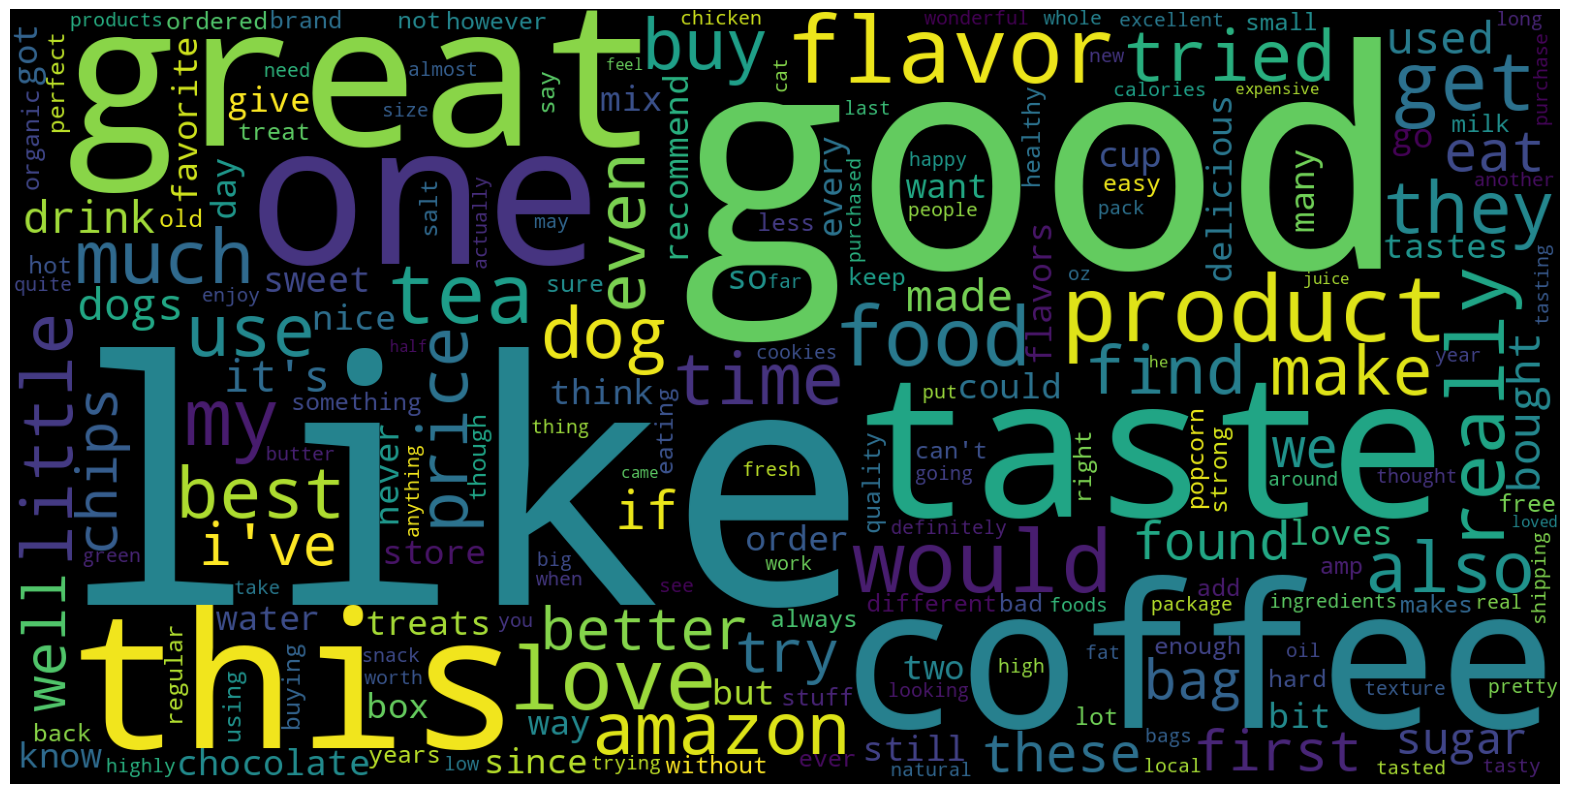

In [ ]:
flat_list = [item for sublist in df.text for item in sublist] #unique list containing all tokens 
  
fig = plt.figure(figsize=(20,14))
wordcloud = WordCloud(width=1600, height=800, background_color="black").generate_from_frequencies(Counter(flat_list))
plt.axis("off")
plt.imshow(wordcloud, interpolation='antialiased')

In [ ]:
get_counter(df.text).most_common(100)

[('like', 14289),
 ('good', 11429),
 ('coffee', 9878),
 ('great', 9849),
 ('taste', 9612),
 ('one', 9588),
 ('this', 8913),
 ('product', 8344),
 ('flavor', 8269),
 ('love', 7360),
 ('would', 7162),
 ('tea', 6478),
 ('food', 6265),
 ('get', 6057),
 ('my', 5923),
 ('really', 5735),
 ('much', 5190),
 ('time', 4802),
 ('they', 4767),
 ('use', 4711),
 ('amazon', 4676),
 ('also', 4595),
 ('little', 4594),
 ('tried', 4576),
 ('best', 4514),
 ('dog', 4495),
 ('buy', 4423),
 ('price', 4330),
 ('make', 4186),
 ('find', 4101),
 ('even', 4055),
 ('better', 4014),
 ('try', 3991),
 ("i've", 3953),
 ('well', 3903),
 ('chips', 3631),
 ('first', 3591),
 ('eat', 3570),
 ('we', 3472),
 ('bag', 3404),
 ('if', 3283),
 ('these', 3247),
 ('found', 3091),
 ('sugar', 3024),
 ('bought', 3020),
 ('made', 3001),
 ("it's", 2985),
 ('used', 2970),
 ('drink', 2938),
 ('dogs', 2883),
 ('chocolate', 2856),
 ('sweet', 2834),
 ('cup', 2811),
 ('treats', 2724),
 ('two', 2718),
 ('way', 2710),
 ('think', 2656),
 ('mix', 2

In [ ]:
len(df.text.iloc[10])

68

# Fixing

In [ ]:
np.where(pd.isnull(df))

(array([], dtype=int64), array([], dtype=int64))

In [ ]:
cond = df['text'].str.contains(r'^\s*$', na=False)
cond[cond==True]

Series([], Name: text, dtype: bool)

In [ ]:
df = df.drop(index=[5588,7164]).reset_index(drop=True)

In [ ]:
cond = df['text'].str.contains(r'^\s*$', na=False)
cond[cond==True]

Series([], Name: text, dtype: bool)

# Save

In [ ]:
def convert_list_to_string(row):
  tmp_str = ""
  for word in row:
    tmp_str += str(word) + ","
  return tmp_str[:len(tmp_str)-1]

In [ ]:
df.text = df.text.apply(convert_list_to_string)
df.to_csv(PATH_DATASET_PREPROCESSED, index=False)